<a href="https://colab.research.google.com/github/daradanci/DeepLearning/blob/main/notebooks/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №2

# Задание



По заданию выбрать свои классы и обучить сверточную нейронную сеть из примера, используя GPU, а затем повысить точность модели. Провести три обучения для 3 разных тактик пуллинга: пуллинг с помощью шага свёртки stride, макс пуллинг, усредняющий пуллинг. Сравнить достигнутое качество, время обучения и степень переобучения. Выбрать лучшую конфигурацию. Сохранить модель. Перезапустить среду выполнения - теряются все текующие переменные.

Загрузить в colab готовую уже обученную на cifar100 модель. Преобразовать в onnx и сохранить локально.

Скачать [каталог](https://github.com/iu5git/Deep-learning/blob/main/ONNX_script) с html-файлом и встроить в него два файла моделей - обученную на ЛР1 и на ЛР2.

Скачать картинки из интернета согласно варианту и открыть их в html по кнопке. Автоматически в скрипте масштабируется изображение.

Выбрать в js нужные классы для готовой модели. Проверить на устойчивость обе модели, полносвязную и свёрточную, двигая картинку, убедиться в наличии свойства инвариантности сверточного слоя.

Отчет должен содержать: титульный лист, задание с вариантом, скриншоты и краткие пояснения по каждому этапу лабораторной работы, результаты работы модели ONNX в скрипте в браузере на загруженных изображениях, итоговую таблицу со результатами для всех вариантов обучения.

Варианты классов использовать из 1 лабораторной работы.

Дополнительно можно ознакомиться с визуализацией функции потерь Loss landscape

# Задания для самостоятельной работы
1. Проанализируйте результаты обучения вашей модели. Как изменилась точность на обучающей и тестовой выборке по сравнению с полносвязной моделью?
2. Измените вашу модель - сравните три варианта пуллинга по заданию. Сравните результаты обучения этих 3-ех вариантов
3. Измените вашу модель - поменяйте количество сверточных слоев, размер ядра свертки, шаг свертки и заполнение. Проанализируйте результаты обучения.
4. Возникает ли переобучение вашей модели?
5. Измените гиперпараметры обучения для повышения точности модели: количество эпох, размер батча, скорость обучения
6. Сравните полносвязную и сверточную нейронную сеть с помощью [визуализации](https://github.com/iu5git/Deep-learning/blob/main/ONNX_script). Сравните результаты моделей и их реакцию на сдвиги изображения. Укажите в отчете отличия моделей и поясните их.
7. Укажите, какие действия помогли повысить точность вашей модели и объясните почему.

# Контрольные вопросы для защиты
1. Сверточная нейронная сеть, объясните структуру, вычисления и назначение слоев и выполняемые преобразования.
2. Что такое свертка, размер ядра, шаг, заполнение? Объясните назначение.
3. Сравните количество нейронов, связей и параметров в полносвязной и сверточной нейронных сетях.
4. Объясните алгоритм оптимизации с моментом. В каких случаях применяется?
5. Свойства свертки

# Часть 1. Классификация изображений CIFAR100

## Импортирование необходимых библиотек

In [9]:
#!pip install torch --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 799.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
#!pip install torchsummary
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torchsummary import summary
import pickle
from sklearn.metrics import classification_report
from PIL import Image
from tqdm.auto import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

## Определяем видеокарту GPU, чтобы на ней учить нейронную сеть

In [8]:
!nvidia-smi

Thu Mar 13 08:29:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Загрузка и распаковка набора данных CIFAR100

In [3]:
!wget https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz
!tar -xvzf cifar-100-python.tar.gz

--2025-03-13 08:34:15--  https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169001437 (161M) [application/x-gzip]
Saving to: ‘cifar-100-python.tar.gz’

cifar-100-python.ta 100%[===================>] 161.17M  30.8MB/s    in 5.6s    

2025-03-13 08:34:20 (28.7 MB/s) - ‘cifar-100-python.tar.gz’ saved [169001437/169001437]

cifar-100-python/
cifar-100-python/file.txt~
cifar-100-python/train
cifar-100-python/test
cifar-100-python/meta


## Чтение тренировочной и тестовой выборки

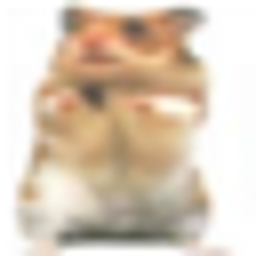

In [4]:
with open('cifar-100-python/train', 'rb') as f:
    data_train = pickle.load(f, encoding='latin1')
with open('cifar-100-python/test', 'rb') as f:
    data_test = pickle.load(f, encoding='latin1')

# Здесь указать ваши классы по варианту!!!
CLASSES = [36, 38, 43]

train_X = data_train['data'].reshape(-1, 3, 32, 32)
train_X = np.transpose(train_X, [0, 2, 3, 1]) # NCWC -> NWHC
train_y = np.array(data_train['fine_labels'])
mask = np.isin(train_y, CLASSES)
train_X = train_X[mask].copy()
train_y = train_y[mask].copy()
train_y = np.unique(train_y, return_inverse=1)[1]
del data_train

test_X = data_test['data'].reshape(-1, 3, 32, 32)
test_X = np.transpose(test_X, [0, 2, 3, 1])
test_y = np.array(data_test['fine_labels'])
mask = np.isin(test_y, CLASSES)
test_X = test_X[mask].copy()
test_y = test_y[mask].copy()
test_y = np.unique(test_y, return_inverse=1)[1]
del data_test
Image.fromarray(train_X[50]).resize((256,256))

## Создание Pytorch DataLoader'a

In [17]:
batch_size = 128
dataloader = {}
for (X, y), part in zip([(train_X, train_y), (test_X, test_y)],
                        ['train', 'test']):
    tensor_x = torch.Tensor(X)
    tensor_y = F.one_hot(torch.Tensor(y).to(torch.int64),
                                     num_classes=len(CLASSES))/1.
    dataset = TensorDataset(tensor_x, tensor_y) # создание объекта датасета
    dataloader[part] = DataLoader(dataset, batch_size=batch_size, shuffle=True) # создание экземпляра класса DataLoader
dataloader

{'train': <torch.utils.data.dataloader.DataLoader at 0x7afe6c638350>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7afe3d916050>}

## Создание Pytorch модели сверточной нейронной сети

In [13]:
class Normalize(nn.Module):
    def __init__(self, mean, std):
        super(Normalize, self).__init__()
        self.mean = torch.tensor(mean).to(device)
        self.std = torch.tensor(std).to(device)

    def forward(self, input):
        x = input / 255.0
        x = x - self.mean
        x = x / self.std
        return x.permute(0, 3, 1, 2) # nhwc -> nm

class GlobalMaxPool2d(nn.Module):
    def __init__(self):
        super(GlobalMaxPool2d, self).__init__()

    def forward(self, input):
        out = F.adaptive_max_pool2d(input, output_size=1)
        return out.flatten(start_dim=1)

class Cifar100_CNN(nn.Module):
    def __init__(self, hidden_size=32, classes=100):
        super(Cifar100_CNN, self).__init__()
        # https://blog.jovian.ai/image-classification-of-cifar100-dataset-using-pytorch-8b7145242df1
        self.seq = nn.Sequential(
            Normalize([0.5074,0.4867,0.4411],[0.2011,0.1987,0.2025]),
            # Первый сверточный слой (ядро 5x5, шаг 2)
            nn.Conv2d(3, HIDDEN_SIZE, 5, stride=2, padding=2),
            nn.ReLU(),
            # Первый слой пуллинга - усредняющий
            nn.AvgPool2d(2),
            # Второй сверточный слой (ядро 3x3, шаг 1)
            nn.Conv2d(HIDDEN_SIZE, HIDDEN_SIZE*2, 3, stride=1, padding=1),
            nn.ReLU(),
            # Второй слой пуллинга - усредняющий
            nn.AvgPool2d(4),#nn.MaxPool2d(4),

            nn.Flatten(),
            nn.Linear(HIDDEN_SIZE*8, classes),
        )

    def forward(self, input):
        return self.seq(input)

HIDDEN_SIZE = 32
model = Cifar100_CNN(hidden_size=HIDDEN_SIZE, classes=len(CLASSES))
# NEW
model.to(device)
print(model(torch.rand(1, 32, 32, 3).to(device)))
summary(model, input_size=(32, 32, 3))
model

tensor([[-0.2426, -0.2615,  0.0675]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         Normalize-1            [-1, 3, 32, 32]               0
            Conv2d-2             [-1, 32, 8, 8]           2,432
              ReLU-3             [-1, 32, 8, 8]               0
            Conv2d-4             [-1, 64, 8, 8]          18,496
              ReLU-5             [-1, 64, 8, 8]               0
         AvgPool2d-6             [-1, 64, 2, 2]               0
           Flatten-7                  [-1, 256]               0
            Linear-8                    [-1, 3]             771
Total params: 21,699
Trainable params: 21,699
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.12
Params size (MB): 0.08
Estimated Total Size (MB): 0.22
---------------------

Cifar100_CNN(
  (seq): Sequential(
    (0): Normalize()
    (1): Conv2d(3, 32, kernel_size=(5, 5), stride=(4, 4), padding=(2, 2))
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): AvgPool2d(kernel_size=4, stride=4, padding=0)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=256, out_features=3, bias=True)
  )
)

## Выбор функции потерь и оптимизатора градиентного спуска

In [14]:
criterion = nn.CrossEntropyLoss()
# используется SGD c momentum
optimizer = optim.SGD(model.parameters(), lr=5e-3, momentum=0.9)

## Обучение модели по эпохам

  0%|          | 0/2400 [00:00<?, ?it/s]

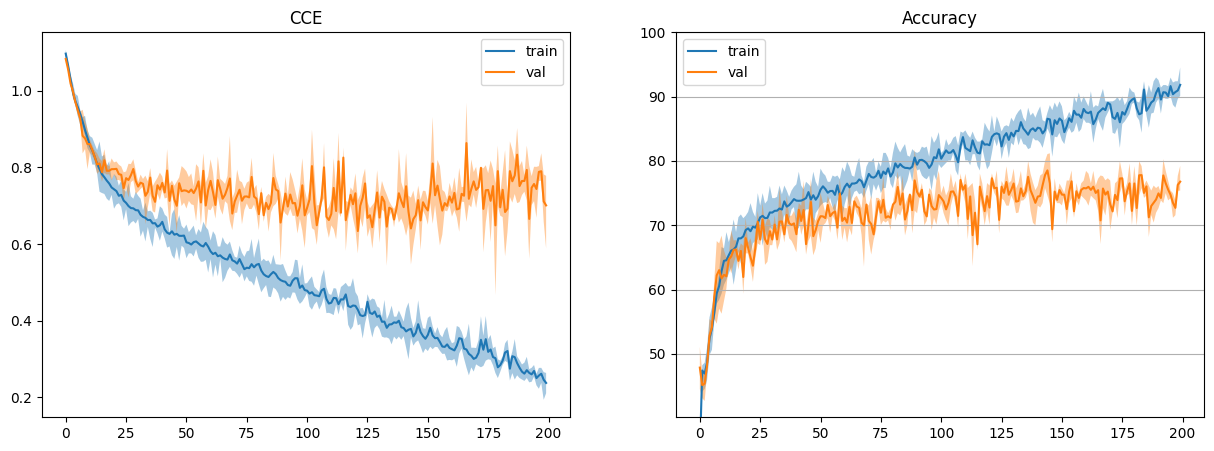

Обучение закончено за 15.188577651977539 секунд


In [15]:
EPOCHS = 200
REDRAW_EVERY = 20
steps_per_epoch = len(dataloader['train'])
steps_per_epoch_val = len(dataloader['test'])
# NEW
pbar = tqdm(total=EPOCHS*steps_per_epoch)
losses = []
losses_val = []
passed = 0
for epoch in range(EPOCHS):  # проход по набору данных несколько раз
    #running_loss = 0.0
    tmp = []
    model.train()
    for i, batch in enumerate(dataloader['train'], 0):
        # получение одного минибатча; batch это двуэлементный список из [inputs, labels]
        inputs, labels = batch
        # на GPU
        inputs, labels = inputs.to(device), labels.to(device)

        # очищение прошлых градиентов с прошлой итерации
        optimizer.zero_grad()

        # прямой + обратный проходы + оптимизация
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        #loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()

        # для подсчёта статистик
        #running_loss += loss.item()
        accuracy = (labels.detach().argmax(dim=-1)==outputs.detach().argmax(dim=-1)).\
                    to(torch.float32).mean().cpu()*100
        tmp.append((loss.item(), accuracy.item()))
        pbar.update(1)
    #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / steps_per_epoch:.3f}')
    losses.append((np.mean(tmp, axis=0),
                   np.percentile(tmp, 25, axis=0),
                   np.percentile(tmp, 75, axis=0)))
    #running_loss = 0.0
    tmp = []
    model.eval()
    with torch.no_grad(): # отключение автоматического дифференцирования
        for i, data in enumerate(dataloader['test'], 0):
            inputs, labels = data
            # на GPU
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            #running_loss += loss.item()
            accuracy = (labels.argmax(dim=-1)==outputs.argmax(dim=-1)).\
                        to(torch.float32).mean().cpu()*100
            tmp.append((loss.item(), accuracy.item()))
    #print(f'[{epoch + 1}, {i + 1:5d}] val loss: {running_loss / steps_per_epoch_val:.3f}')
    losses_val.append((np.mean(tmp, axis=0),
                       np.percentile(tmp, 25, axis=0),
                       np.percentile(tmp, 75, axis=0)))
    if (epoch+1) % REDRAW_EVERY != 0:
        continue
    clear_output(wait=False)
    passed += pbar.format_dict['elapsed']
    pbar = tqdm(total=EPOCHS*steps_per_epoch, miniters=5)
    pbar.update((epoch+1)*steps_per_epoch)
    x_vals = np.arange(epoch+1)
    _, ax = plt.subplots(1, 2, figsize=(15, 5))
    stats = np.array(losses)
    stats_val = np.array(losses_val)
    ax[1].set_ylim(stats_val[:, 0, 1].min()-5, 100)
    ax[1].grid(axis='y')
    for i, title in enumerate(['CCE', 'Accuracy']):
        ax[i].plot(x_vals, stats[:, 0, i], label='train')
        ax[i].fill_between(x_vals, stats[:, 1, i],
                           stats[:, 2, i], alpha=0.4)
        ax[i].plot(x_vals, stats_val[:, 0, i], label='val')
        ax[i].fill_between(x_vals,
                           stats_val[:, 1, i],
                           stats_val[:, 2, i], alpha=0.4)
        ax[i].legend()
        ax[i].set_title(title)
    plt.show()
print('Обучение закончено за %s секунд' % passed)

## Проверка качества модели по классам на обучающей и тестовой выборках

In [16]:
for part in ['train', 'test']:
    y_pred = []
    y_true = []
    with torch.no_grad(): # отключение автоматического дифференцирования
        for i, data in enumerate(dataloader[part], 0):
            inputs, labels = data
             # на GPU
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs).detach().cpu().numpy()
            y_pred.append(outputs)
            y_true.append(labels.cpu().numpy())
        y_true = np.concatenate(y_true)
        y_pred = np.concatenate(y_pred)
        print(part)
        print(classification_report(y_true.argmax(axis=-1), y_pred.argmax(axis=-1),
                                    digits=4, target_names=list(map(str, CLASSES))))
        print('-'*50)

train
              precision    recall  f1-score   support

          36     0.9470    0.9300    0.9384       500
          38     0.9286    0.9360    0.9323       500
          43     0.9030    0.9120    0.9075       500

    accuracy                         0.9260      1500
   macro avg     0.9262    0.9260    0.9261      1500
weighted avg     0.9262    0.9260    0.9261      1500

--------------------------------------------------
test
              precision    recall  f1-score   support

          36     0.8111    0.7300    0.7684       100
          38     0.7700    0.7700    0.7700       100
          43     0.7091    0.7800    0.7429       100

    accuracy                         0.7600       300
   macro avg     0.7634    0.7600    0.7604       300
weighted avg     0.7634    0.7600    0.7604       300

--------------------------------------------------


# Часть 2. Сохранение модели в ONNX

In [ ]:
# сохраниение модели
# ПЕРВЫЙ СПОСОБ: сохранение параметров
PATH = 'cifar_cnn.pth'
torch.save(model.state_dict(), PATH)
# загрузка
new_model = Cifar100_CNN(hidden_size=HIDDEN_SIZE, classes=len(CLASSES))
new_model.load_state_dict(torch.load(PATH))
new_model.eval()

# ВТОРОЙ СПОСОБ: сохранение всей архитектуры
PATH2 = 'cifar_cnn.pt'
torch.save(model, PATH2)
# загрузка
new_model_2 = torch.load(PATH2)
new_model_2.eval()

<ipython-input-11-1e1b945272d3>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load(PATH))
<ipython-input-11-1e1b945272d3>:14: FutureWarnin

Cifar100_CNN(
  (seq): Sequential(
    (0): Normalize()
    (1): Conv2d(3, 32, kernel_size=(5, 5), stride=(4, 4), padding=(2, 2))
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): AvgPool2d(kernel_size=4, stride=4, padding=0)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=256, out_features=3, bias=True)
  )
)

In [ ]:
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 102.8 MB/s eta 0:00:00


In [ ]:
# входной тензор для модели
x = torch.randn(1, 32, 32, 3, requires_grad=True).to(device)
torch_out = model(x)

# экспорт модели
torch.onnx.export(model,               # модель
                  x,                   # входной тензор (или кортеж нескольких тензоров)
                  "cifar100_CNN.onnx", # куда сохранить (либо путь к файлу либо fileObject)
                  export_params=True,  # сохраняет веса обученных параметров внутри файла модели
                  opset_version=9,     # версия ONNX
                  do_constant_folding=True,  # следует ли выполнять укорачивание констант для оптимизации
                  input_names = ['input'],   # имя входного слоя
                  output_names = ['output'],  # имя выходного слоя
                  dynamic_axes={'input' : {0 : 'batch_size'},    # динамичные оси, в данном случае только размер пакета
                                'output' : {0 : 'batch_size'}})

# Loss landscape

## идея https://arxiv.org/abs/1712.09913

In [ ]:
from copy import deepcopy
state_dict_backup = deepcopy(model.state_dict())

In [ ]:
def generate_theta(seed=None):
    model.eval()
    model.load_state_dict(state_dict_backup)
    if seed is not None:
        np.random.seed(seed)
    params = []
    with torch.no_grad():
        for w in model.parameters():
            params.append(w.detach().cpu().numpy())
    params_n = np.concatenate([p.flatten() for p in params]).size
    random_theta_flat = np.random.normal(size=params_n)
    random_theta = []
    offset = 0
    for p in params:
        p_weights = p.flatten().size
        random_theta.append(random_theta_flat[offset:offset+p_weights].\
                            reshape(*p.shape))
        # normalization
        rank = random_theta[-1].shape.__len__()
        if rank == 4: # convolution
            #print('Conv')
            # Frobenius norm
            norm_r = np.sqrt((random_theta[-1]**2).sum(axis=-1).sum(axis=-1))
            norm_p = np.sqrt((p**2).sum(axis=-1).sum(axis=-1))
            norm = (norm_p / norm_r).reshape(*norm_p.shape, 1, 1)
        elif rank == 2: # fully connected
            #print('FC')
            norm_r = np.sqrt((random_theta[-1]**2).sum(axis=-1))
            norm_p = np.sqrt((p**2).sum(axis=-1))
            norm = (norm_p / norm_r).reshape(-1, 1)
        elif rank == 1: # bias
            #print('bias')
            norm_r = np.sqrt((random_theta[-1]**2).sum())
            norm_p = np.sqrt((p**2).sum())
            norm = norm_p / norm_r
        random_theta[-1] = random_theta[-1]*norm
        offset += p_weights
    assert offset==params_n, \
            "Not all params are utilized. Expected %d, found %d"%(params_n, offset)
    return random_theta

theta1 = generate_theta(seed=0)
theta2 = generate_theta(seed=1011)

In [ ]:
criterion2 = nn.CrossEntropyLoss(reduction='none')
loss_curve = []
alphas = np.arange(-1500, 1500, step=5)/1000
for alpha in tqdm(alphas):
    state_dict = model.state_dict()
    for (k, v), v_new in zip(state_dict_backup.items(), theta1):
        tensor = v.clone().detach() + \
              alpha*(torch.tensor(v_new, device=device) - v.clone().detach())
        state_dict[k] = tensor
    model.load_state_dict(state_dict)
    loss = []

    with torch.no_grad(): # отключение автоматического дифференцирования
        for i, data in enumerate(dataloader['test'], 0):
            inputs, labels = data
            # на GPU
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs).detach()
            loss.append(criterion2(outputs, labels).detach().cpu().numpy())
    loss_curve.append(np.concatenate(loss).mean())

  0%|          | 0/600 [00:00<?, ?it/s]

Text(0, 0.5, 'CCE, log10')

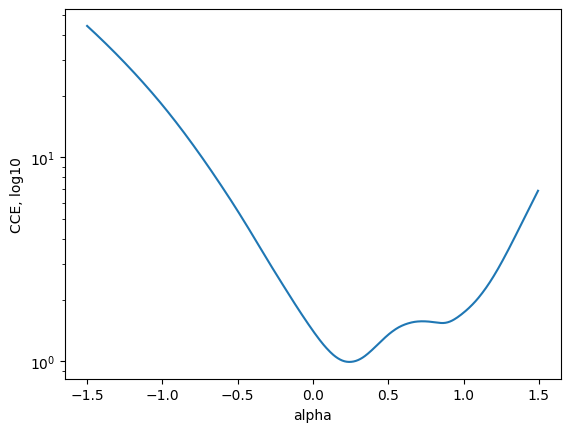

In [ ]:
plt.plot(alphas, loss_curve)
plt.yscale('log')
plt.xlabel('alpha')
plt.ylabel('CCE, log10')

## 2D

In [ ]:
# увеличив step, можно значительно ускорить вычисления
# однако вместе с этим теряется разрешение
alphas = []
vals = np.arange(-150, 151, step=5)/100
size = vals.size

# создаём заданный растр
for a1 in vals:
    for a2 in vals:
        alphas.append((a1, a2))

alphas = np.array(alphas)

In [ ]:
Z = []
for a1, a2 in tqdm(alphas):
    state_dict = model.state_dict()
    for (k, v), v_new, v_new2 in zip(state_dict_backup.items(), theta1, theta2):
        # линейная интерполяция
        tensor = v.clone().detach() + \
                 a1*(torch.tensor(v_new, device=device) - \
                     v.clone().detach())
        # ещё раз со вторым вектором
        tensor = tensor + a2*(torch.tensor(v_new2, device=device) - tensor)
        state_dict[k] = tensor
        #print(k, tensor, v_new)
    model.load_state_dict(state_dict)
    loss = []
    with torch.no_grad(): # отключение автоматического дифференцирования
        for i, data in enumerate(dataloader['test'], 0):
            inputs, labels = data
            # на GPU
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs).detach()#.cpu().numpy()
            loss.append(criterion2(outputs, labels).detach().cpu().numpy())
    Z.append(np.concatenate(loss).mean())
ZZ = np.array(Z)

  0%|          | 0/3721 [00:00<?, ?it/s]

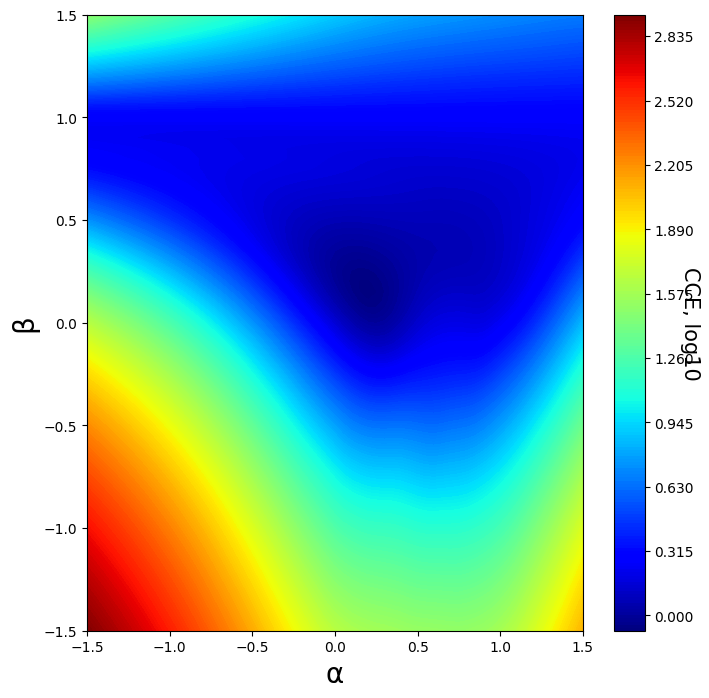

In [ ]:
# настройка размера графика
plt.figure(figsize=(8, 8))
# отрисовка закрашенных контуров, аналогично 2 части 1 ЛР
cs = plt.contourf(alphas[:,0].reshape(size, size),
             alphas[:,1].reshape(size, size),
             np.log10(ZZ.reshape(size, size)),
             levels=255,
             cmap=plt.cm.jet,
             )
# установка цветовой шкалы и её названия
plt.colorbar(cs).ax.set_ylabel('CCE, log10', rotation=270, fontsize=15)
# установка названий осям X, Y
plt.xlabel('α', fontsize=20)
plt.ylabel('β', fontsize=20)
plt.show()

## 3D

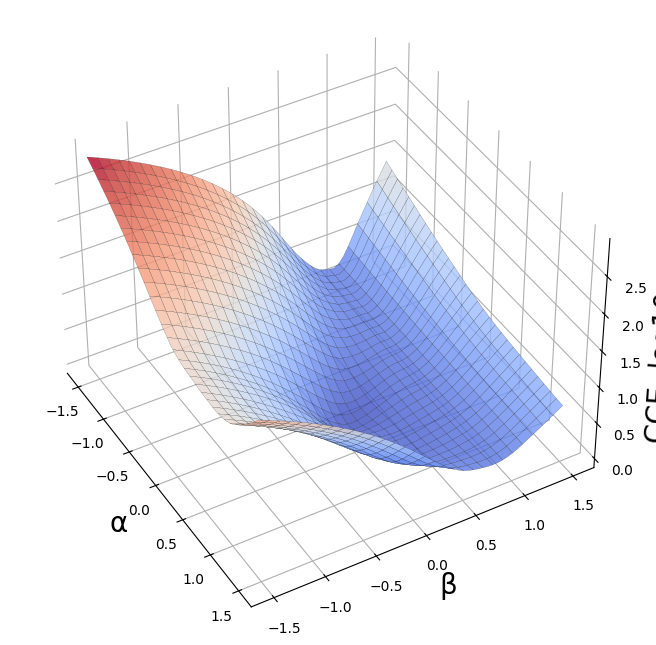

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": "3d"})
# установка названий осям X, Y и Z
ax.set_xlabel('α', fontsize=20)
ax.set_ylabel('β', fontsize=20)
ax.set_zlabel('CCE, log10', fontsize=20)
# выставление прозрачности сетки, для красоты
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# отрисовка 3D поверхности, данные для отрисовки аналогичны contourf
surf = ax.plot_surface(alphas[:,0].reshape(size, size),
                       alphas[:,1].reshape(size, size),
                       np.log10(ZZ.reshape(size, size)),
                       cmap=plt.cm.coolwarm,
                       linewidth=0.1,
                       edgecolors='k',
                       alpha=0.8,
                       antialiased=True)
# первый агрумент - вращение вокруг XY, второрй аргумент - вокруг YZ
ax.view_init(40, -30)